In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
import numpy as np
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot


# Define the tickers
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "BRK-B", "JNJ", "WMT", "V"]
forex = ["EURUSD=X", "GBPUSD=X", "USDJPY=X", "AUDUSD=X", "USDCAD=X", "USDCHF=X", "NZDUSD=X", "EURGBP=X", "EURJPY=X", "GBPJPY=X"]
cryptos = ["BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "USDC-USD", "XRP-USD", "ADA-USD", "SOL-USD", "DOGE-USD", "DOT-USD"]

# Function to fetch data for EDA
def fetch_data(tickers, period='1y'):
    data = {}
    for ticker in tickers:
        data[ticker] = yf.download(ticker, period=period)
    return data

# Fetch the data for EDA
stock_data = fetch_data(stocks)
forex_data = fetch_data(forex)
crypto_data = fetch_data(cryptos)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

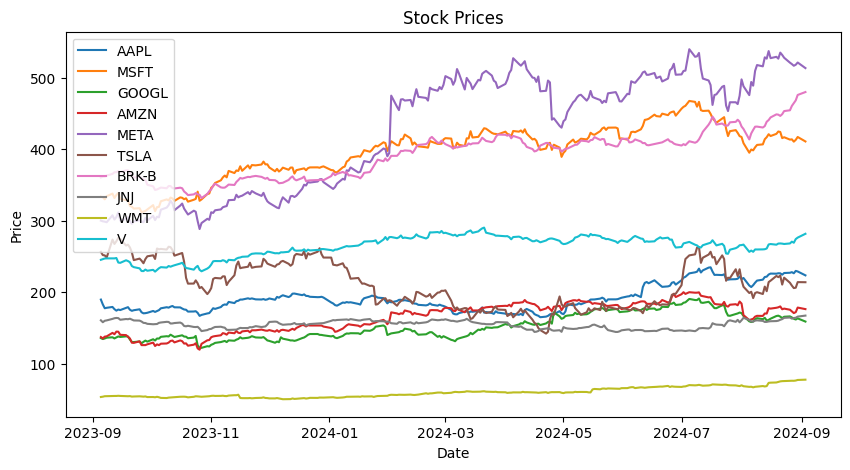

In [55]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
plt.figure(figsize=(10, 5))

# Subplot 1: Closing Prices (Stock)
for ticker in stocks:
    plt.plot(stock_data[ticker]['Close'], label=ticker)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig("Stock Price")
plt.show()

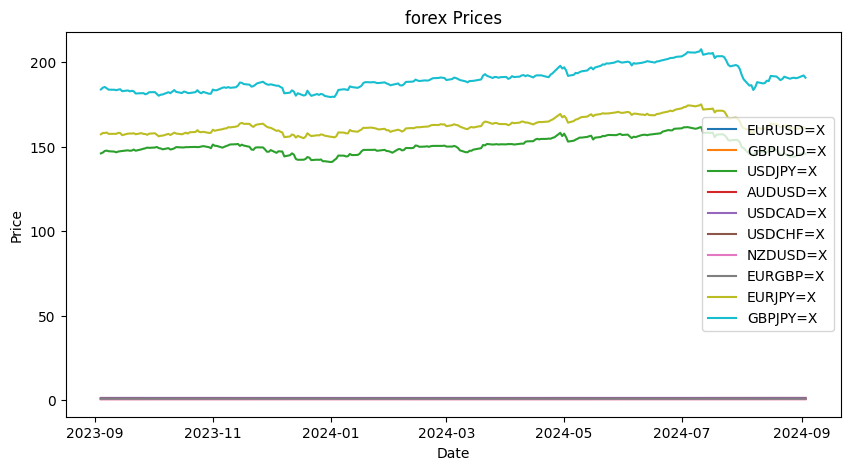

In [63]:
# Create a figure with 3 subplots
plt.figure(figsize=(10, 5))

# Subplot 1: Closing Prices (forex)
for ticker in forex:
    plt.plot(forex_data[ticker]['Close'], label=ticker)
plt.title('forex Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('Forex Price')
plt.show()


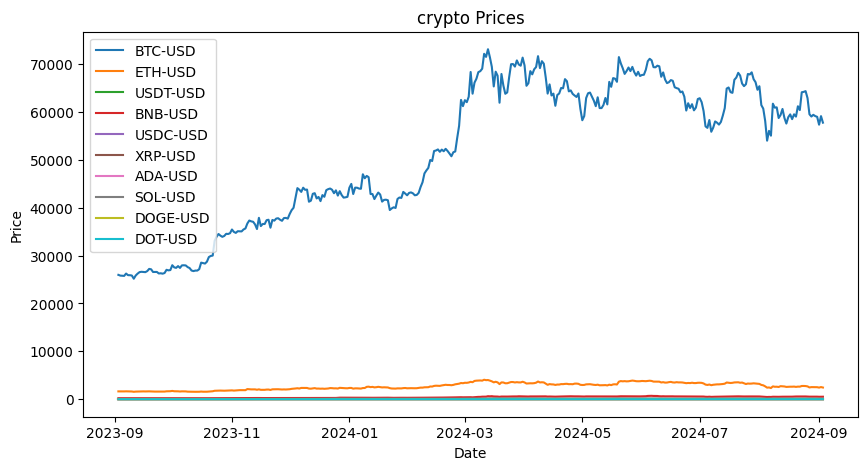

In [69]:
# Create a figure with 3 subplots
plt.figure(figsize=(10, 5))
# Subplot 1: Closing Prices (crypto)
for ticker in cryptos:
    plt.plot(crypto_data[ticker]['Close'], label=ticker)
plt.title('crypto Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('crypto Prices.png')
plt.show()


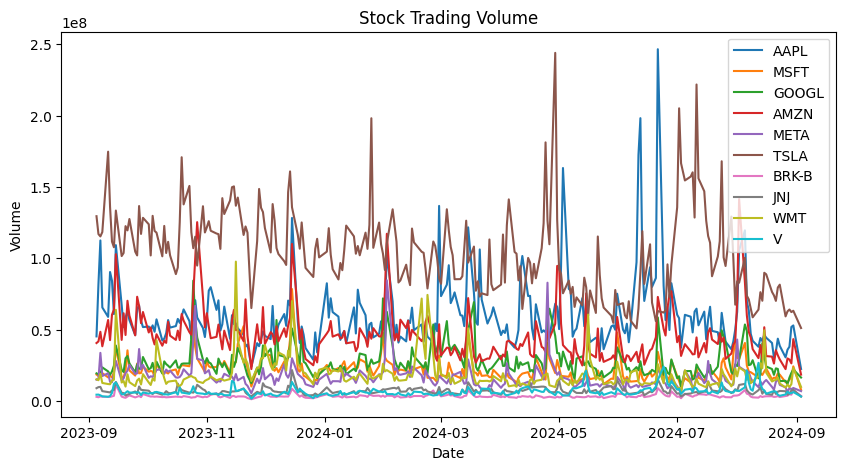

In [56]:
# Volume of Stocks
plt.figure(figsize=(10, 5))
for ticker in stocks:
    plt.plot(stock_data[ticker]['Volume'], label=ticker)
plt.title('Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.savefig("Stock Trading Volume")
plt.show()

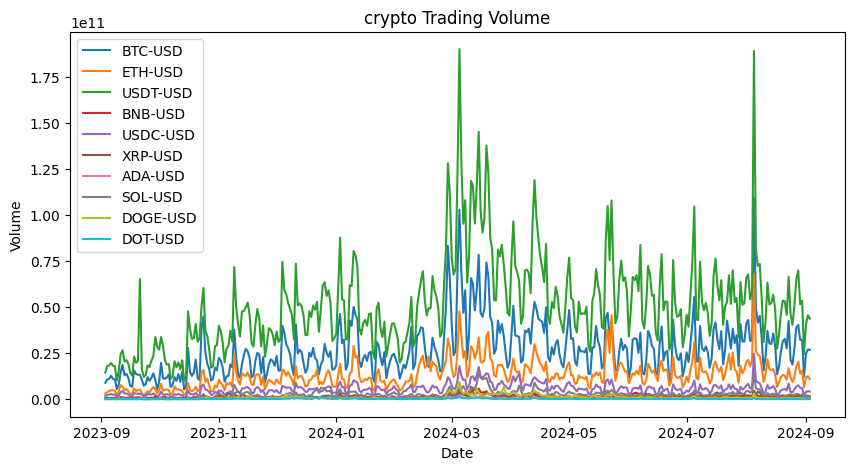

In [70]:
# Volume of crypto
plt.figure(figsize=(10, 5))
for ticker in cryptos:
    plt.plot(crypto_data[ticker]['Volume'], label=ticker)
plt.title('crypto Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.savefig("crypto Trading Volume")
plt.show()

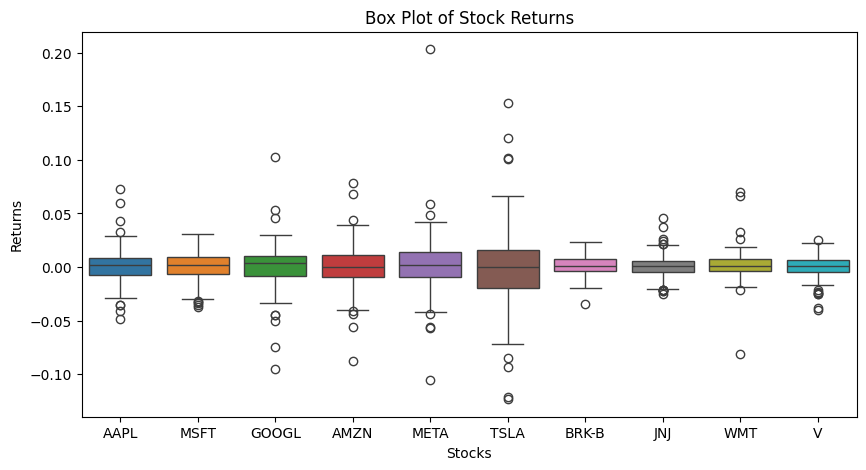

In [57]:
# Calculate returns for stocks
stock_returns_df = pd.DataFrame({ticker: data['Close'].pct_change() for ticker, data in stock_data.items()})
plt.figure(figsize=(10, 5))
sns.boxplot(data=stock_returns_df)
plt.title('Box Plot of Stock Returns')
plt.xlabel('Stocks')
plt.ylabel('Returns')
plt.savefig("Box Plot of Stock Returns")
plt.show()

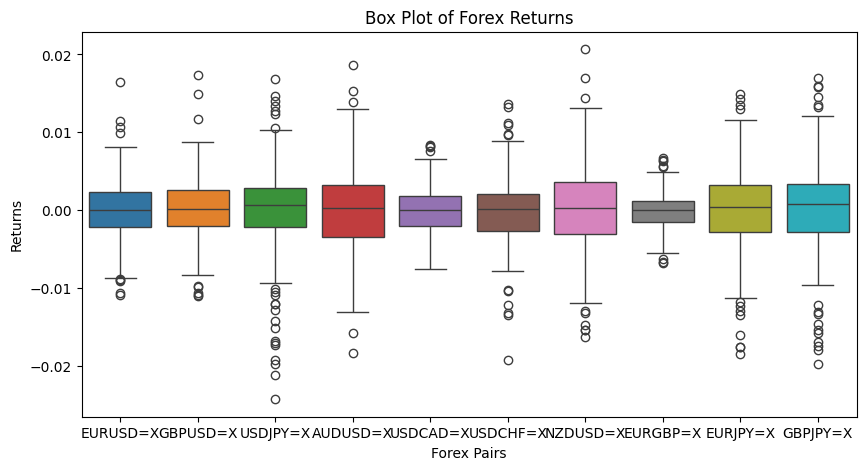

In [65]:
# Calculate returns for forex
forex_returns_df = pd.DataFrame({ticker: data['Close'].pct_change() for ticker, data in forex_data.items()})
plt.figure(figsize=(10, 5))
sns.boxplot(data=forex_returns_df)
plt.title('Box Plot of Forex Returns')
plt.xlabel('Forex Pairs')
plt.ylabel('Returns')
plt.savefig("Box Plot of Forex Returns")
plt.show()

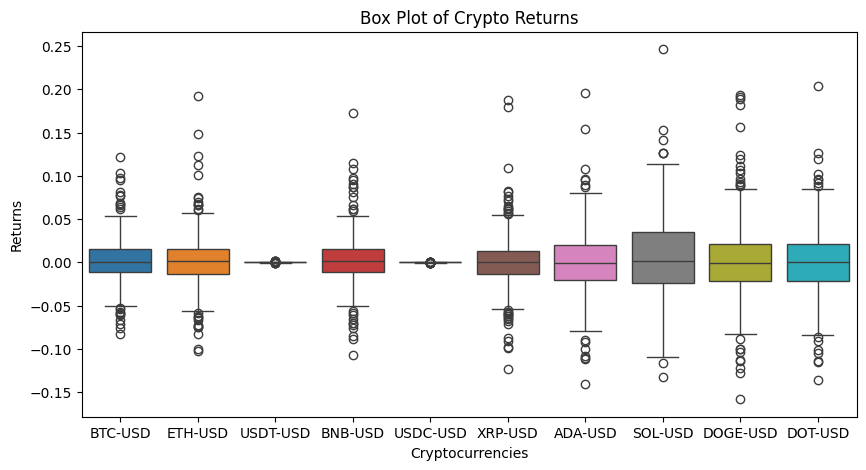

In [71]:
# Calculate returns for cryptos
crypto_returns_df = pd.DataFrame({ticker: data['Close'].pct_change() for ticker, data in crypto_data.items()})
plt.figure(figsize=(10, 5))
sns.boxplot(data=crypto_returns_df)
plt.title('Box Plot of Crypto Returns')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Returns')
plt.savefig("Box Plot of Crypto Returns")
plt.show()


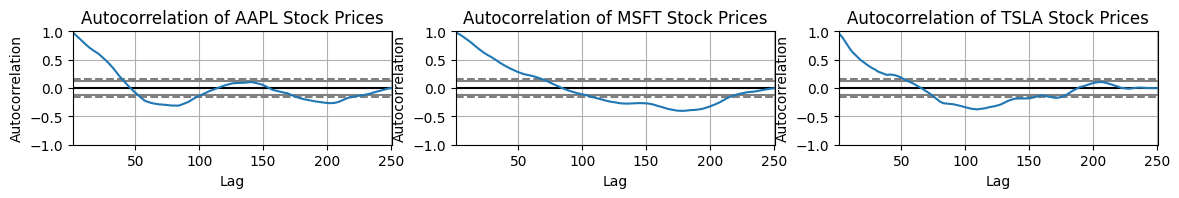

In [59]:
# Define the tickers for stocks
stock_tickers = ['AAPL', 'MSFT', 'TSLA']
plt.figure(figsize=(14, 5))
for i, ticker in enumerate(stock_tickers, 1):
    plt.subplot(3, 3, i)
    autocorrelation_plot(stock_data[ticker]['Close'].dropna())
    plt.title(f'Autocorrelation of {ticker} Stock Prices')
plt.savefig("Autocorrelation of Stocks")
plt.show()

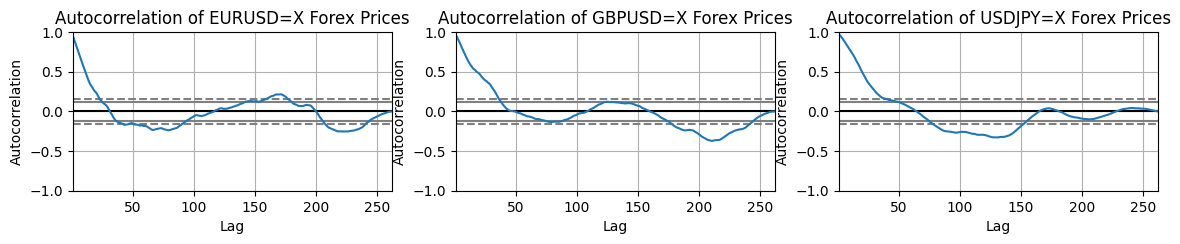

In [28]:
# Define the tickers for forex
forex_tickers = ['EURUSD=X', 'GBPUSD=X', 'USDJPY=X']  
plt.figure(figsize=(14, 7))
# Loop through the forex tickers and create a subplot for each
for i, ticker in enumerate(forex_tickers, 4):
    plt.subplot(3, 3, i)
    autocorrelation_plot(forex_data[ticker]['Close'].dropna())
    plt.title(f'Autocorrelation of {ticker} Forex Prices')
plt.show()

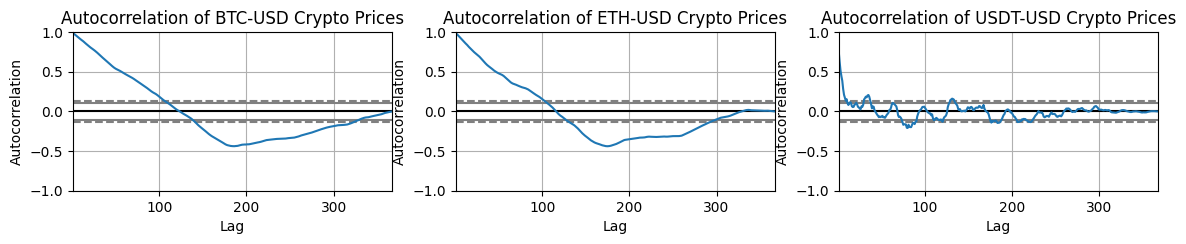

In [29]:
# Define the tickers for crypto
crypto_tickers = ['BTC-USD', 'ETH-USD', 'USDT-USD']
plt.figure(figsize=(14, 7))
# Loop through the crypto tickers and create a subplot for each
for i, ticker in enumerate(crypto_tickers, 7):
    plt.subplot(3, 3, i)
    autocorrelation_plot(crypto_data[ticker]['Close'].dropna())
    plt.title(f'Autocorrelation of {ticker} Crypto Prices')
plt.show()

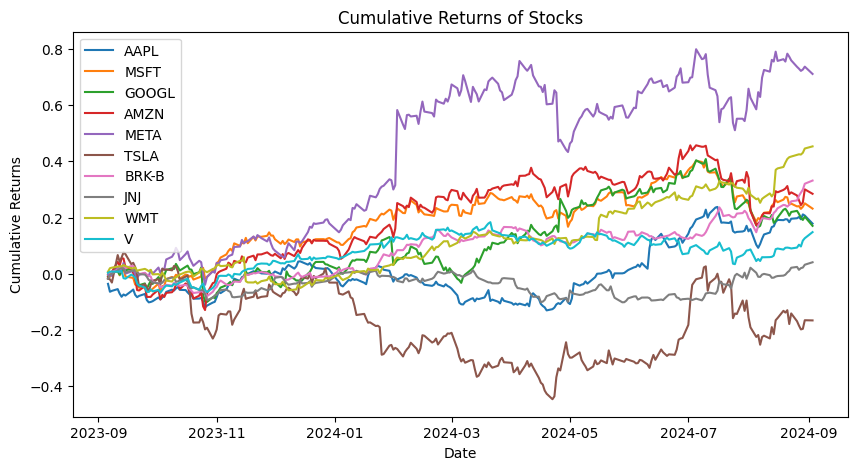

In [37]:
# Subplot 1: Cumulative Returns of Stocks
plt.figure(figsize=(10, 5))
for ticker in stocks:
    cumulative_returns = (1 + stock_data[ticker]['Close'].pct_change()).cumprod() - 1
    plt.plot(cumulative_returns, label=ticker)
    plt.title(f'Cumulative Returns of Stocks')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
plt.show()

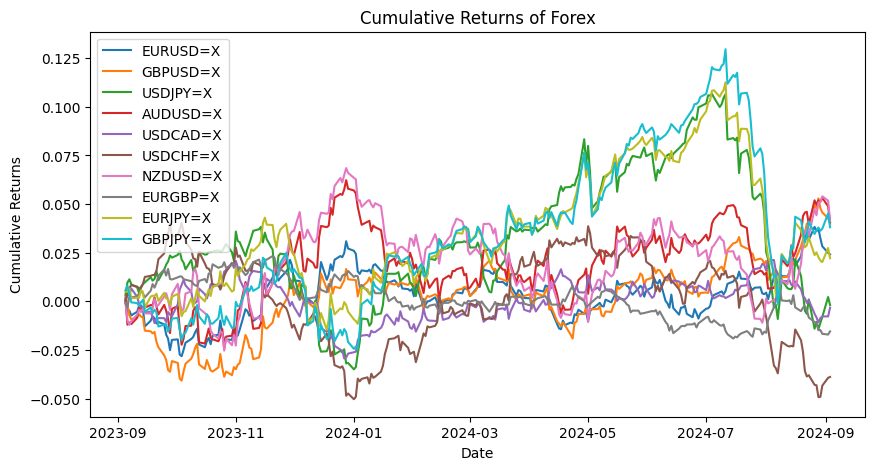

In [36]:
# Subplot 2: Cumulative Returns of forex
plt.figure(figsize=(10, 5))
for ticker in forex:
    cumulative_returns = (1 + forex_data[ticker]['Close'].pct_change()).cumprod() - 1
    plt.plot(cumulative_returns, label=ticker)
    plt.title(f'Cumulative Returns of Forex')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
plt.show()

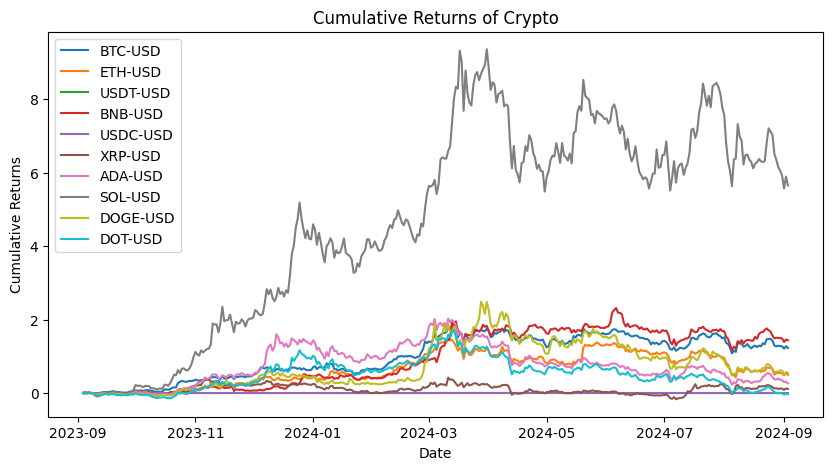

In [35]:
# Subplot 3: Cumulative Returns of Crypto
plt.figure(figsize=(10, 5))
for ticker in cryptos:
    cumulative_returns = (1 + crypto_data[ticker]['Close'].pct_change()).cumprod() - 1
    plt.plot(cumulative_returns, label=ticker)
    plt.title(f'Cumulative Returns of Crypto')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
plt.show()    

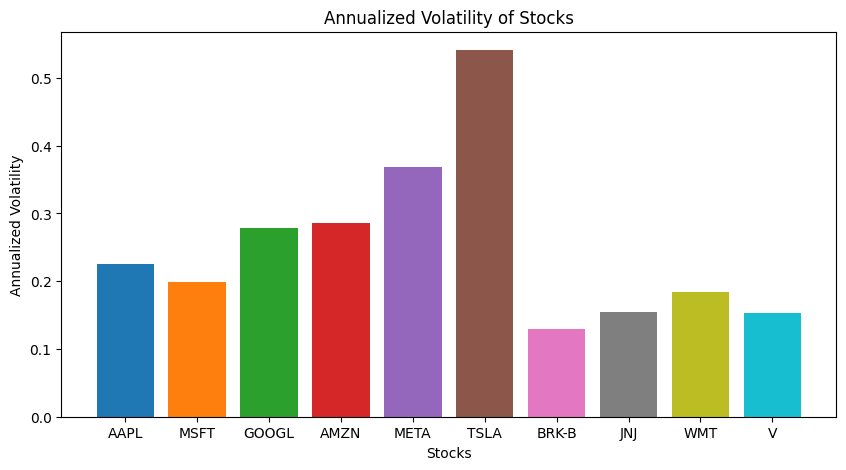

In [61]:
# Define the full lists of tickers for stocks
stock_tickers = list(stock_data.keys())

# Create a figure with subplots for stocks
plt.figure(figsize=(10, 5))
#Annualized Volatility of stocks
for ticker in stock_tickers:
    annual_volatility = stock_data[ticker]['Close'].pct_change().std() * np.sqrt(252)
    plt.bar(ticker, annual_volatility)
plt.title('Annualized Volatility of Stocks')
plt.xlabel('Stocks')
plt.ylabel('Annualized Volatility')
plt.savefig('Annualized Volatility of Stocks')
plt.show()

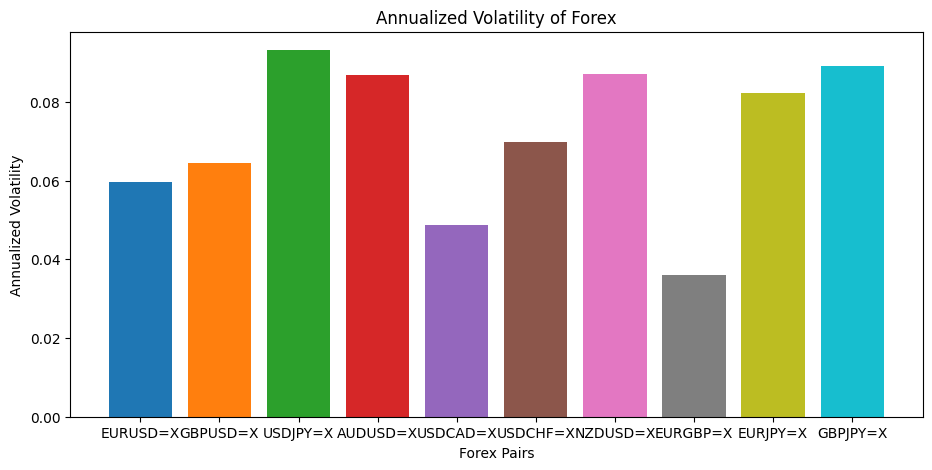

In [66]:
# Define the full lists of tickers for forex
forex_tickers = list(forex_data.keys())

# Create a figure with subplots for forex
plt.figure(figsize=(11, 5))
#Annualized Volatility of forex
for ticker in forex_tickers:
    annual_volatility = forex_data[ticker]['Close'].pct_change().std() * np.sqrt(252)
    plt.bar(ticker, annual_volatility)
plt.title('Annualized Volatility of Forex')
plt.xlabel('Forex Pairs')
plt.ylabel('Annualized Volatility')
plt.savefig("Annualized Volatility of Forex")
plt.show()

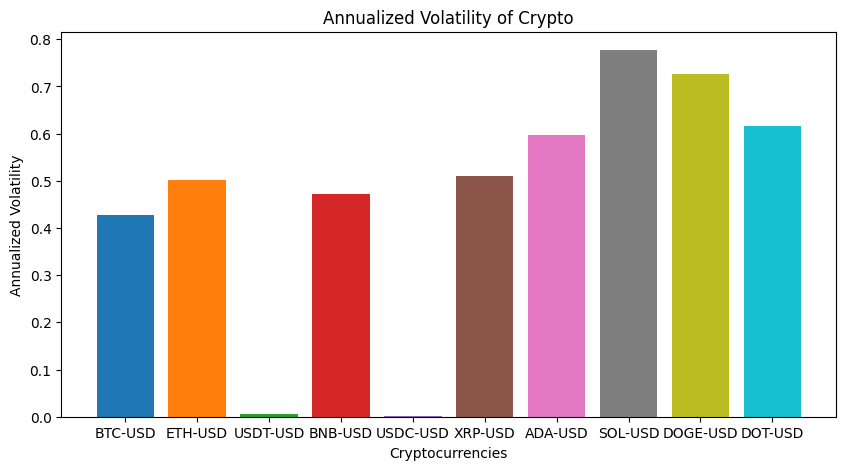

In [72]:
# Define the full lists of tickers for crypto
crypto_tickers = list(crypto_data.keys())

# Create a figure with subplots for crypto
plt.figure(figsize=(10, 5))
#Annualized Volatility of Crypto
for ticker in crypto_tickers:
    annual_volatility = crypto_data[ticker]['Close'].pct_change().std() * np.sqrt(252)
    plt.bar(ticker, annual_volatility)
plt.title('Annualized Volatility of Crypto')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Annualized Volatility')
plt.savefig("Annualized Volatility of Crypto")
plt.show()

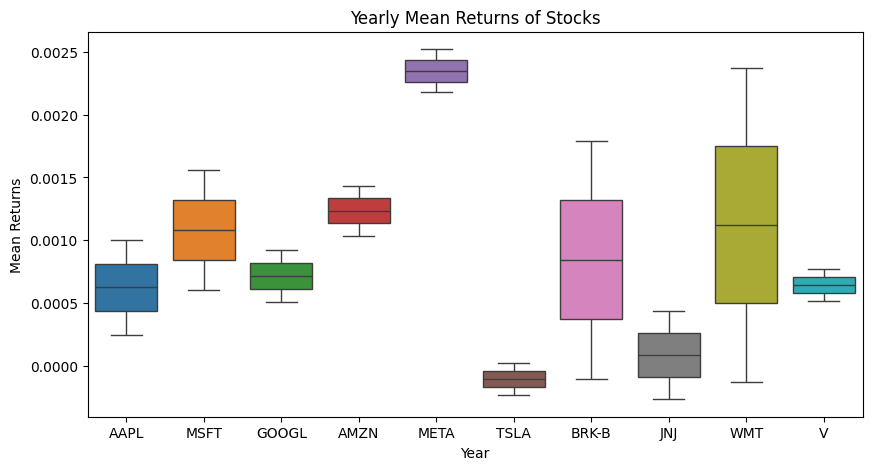

In [43]:
# Calculate yearly mean returns for stocks
stock_yearly_mean_returns = stock_returns_df.resample('YE').mean()

# Create a figure with subplots for stocks
plt.figure(figsize=(10, 5))

# Subplot 1: Yearly Mean Returns of Stocks
sns.boxplot(data=stock_yearly_mean_returns)
plt.title('Yearly Mean Returns of Stocks')
plt.xlabel('Year')
plt.ylabel('Mean Returns')
plt.show()

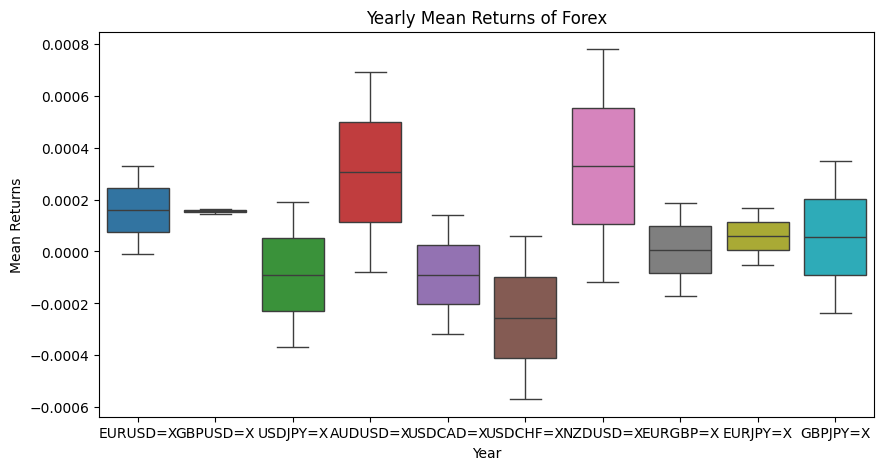

In [44]:
# Calculate yearly mean returns for forex
forex_yearly_mean_returns = forex_returns_df.resample('YE').mean()

# Create a figure with subplots for stocks, forex, and crypto
plt.figure(figsize=(10, 5))

# Subplot 2: Yearly Mean Returns of Forex
sns.boxplot(data=forex_yearly_mean_returns)
plt.title('Yearly Mean Returns of Forex')
plt.xlabel('Year')
plt.ylabel('Mean Returns')
plt.show()

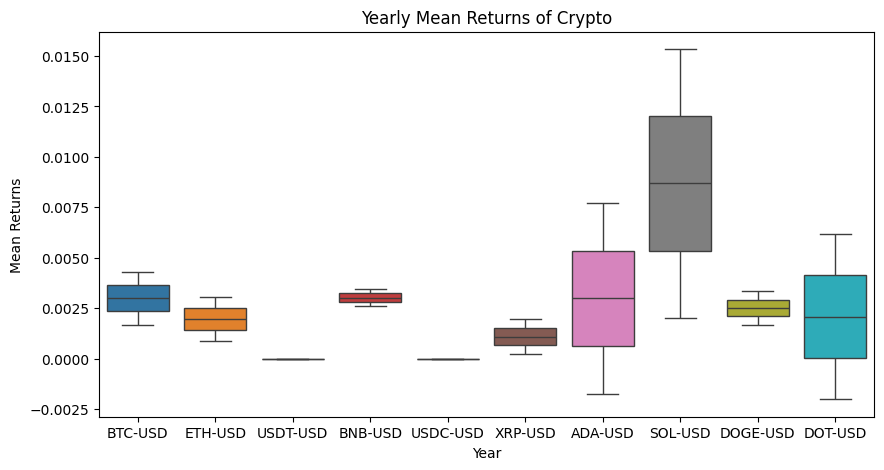

In [45]:
# Calculate yearly mean returns for crypto
crypto_yearly_mean_returns = crypto_returns_df.resample('YE').mean()

# Create a figure with subplots for  crypto
plt.figure(figsize=(10, 5))

# Subplot 3: Yearly Mean Returns of Crypto
sns.boxplot(data=crypto_yearly_mean_returns)
plt.title('Yearly Mean Returns of Crypto')
plt.xlabel('Year')
plt.ylabel('Mean Returns')
plt.show()

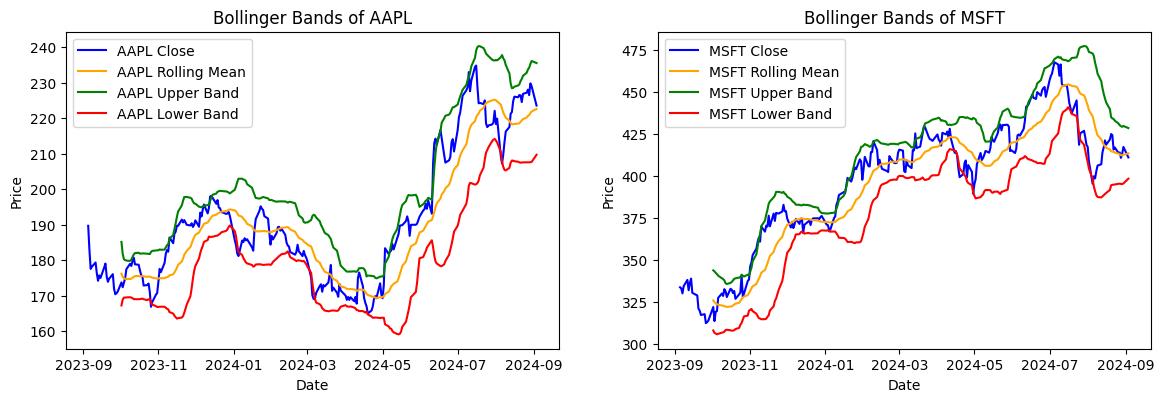

In [62]:
# Define the tickers for stocks
stock_tickers = ['AAPL', 'MSFT']
# Create a figure with subplots for stocks
plt.figure(figsize=(14, 14))
# Subplot 1 and 2: Bollinger Bands for Stocks
for i, ticker in enumerate(stock_tickers, 1):
    plt.subplot(3, 2, i)
    rolling_mean = stock_data[ticker]['Close'].rolling(window=20).mean()
    rolling_std = stock_data[ticker]['Close'].rolling(window=20).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    
    plt.plot(stock_data[ticker]['Close'], label=f'{ticker} Close', color='blue')
    plt.plot(rolling_mean, label=f'{ticker} Rolling Mean', color='orange')
    plt.plot(upper_band, label=f'{ticker} Upper Band', color='green')
    plt.plot(lower_band, label=f'{ticker} Lower Band', color='red')
    
    plt.title(f'Bollinger Bands of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.savefig("Bollinger Bands of Stocks")
plt.show()    

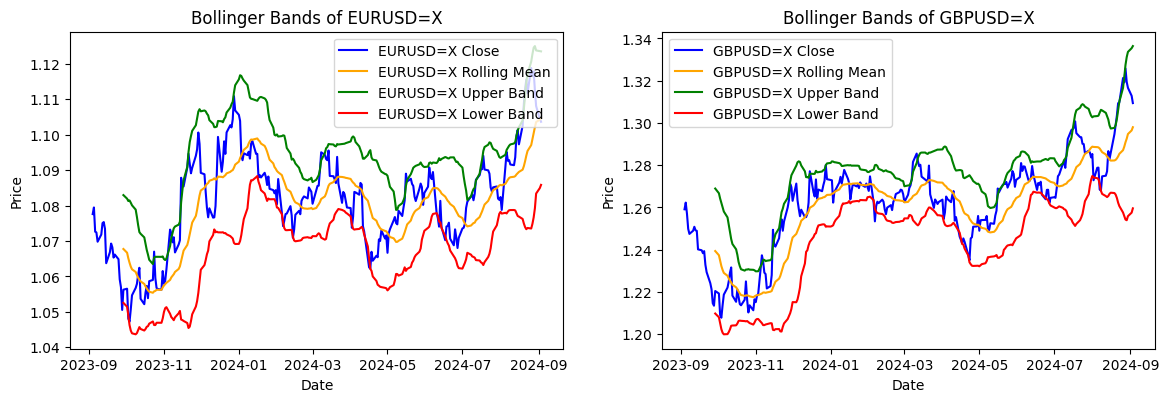

In [68]:
# Define the tickers for forex
forex_tickers = ['EURUSD=X', 'GBPUSD=X'] 
# Create a figure with subplots for forex
plt.figure(figsize=(14,14))
# Subplot 3 and 4: Bollinger Bands for Forex
for i, ticker in enumerate(forex_tickers, 3):
    plt.subplot(3, 2, i)
    rolling_mean = forex_data[ticker]['Close'].rolling(window=20).mean()
    rolling_std = forex_data[ticker]['Close'].rolling(window=20).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    
    plt.plot(forex_data[ticker]['Close'], label=f'{ticker} Close', color='blue')
    plt.plot(rolling_mean, label=f'{ticker} Rolling Mean', color='orange')
    plt.plot(upper_band, label=f'{ticker} Upper Band', color='green')
    plt.plot(lower_band, label=f'{ticker} Lower Band', color='red')
    
    plt.title(f'Bollinger Bands of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.savefig("Bollinger Band of Forex")
plt.show()

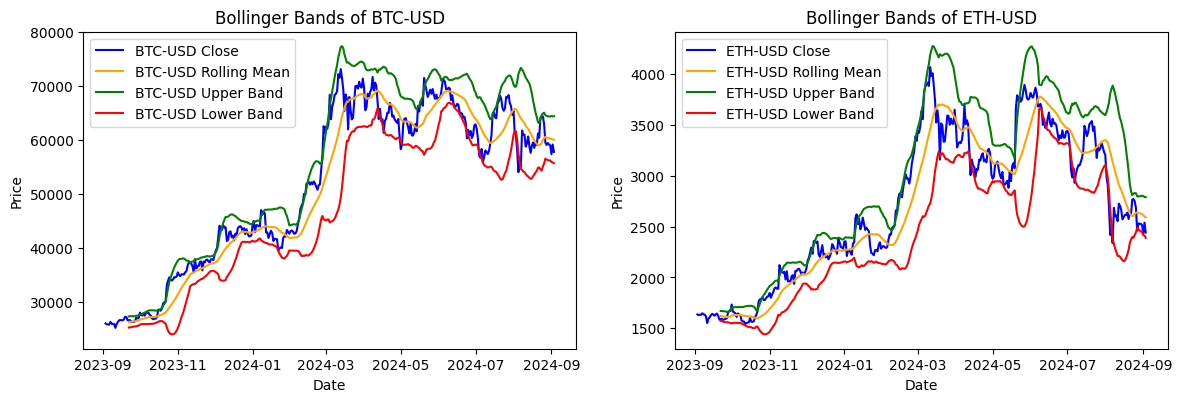

In [73]:
# Define the tickers for crypto 
crypto_tickers = ['BTC-USD', 'ETH-USD']  
# Create a figure with subplots for crypto
plt.figure(figsize=(14, 14))
# Subplot 5 and 6: Bollinger Bands for Crypto
for i, ticker in enumerate(crypto_tickers, 5):
    plt.subplot(3, 2, i)
    rolling_mean = crypto_data[ticker]['Close'].rolling(window=20).mean()
    rolling_std = crypto_data[ticker]['Close'].rolling(window=20).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)
    
    plt.plot(crypto_data[ticker]['Close'], label=f'{ticker} Close', color='blue')
    plt.plot(rolling_mean, label=f'{ticker} Rolling Mean', color='orange')
    plt.plot(upper_band, label=f'{ticker} Upper Band', color='green')
    plt.plot(lower_band, label=f'{ticker} Lower Band', color='red')
    
    plt.title(f'Bollinger Bands of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
plt.savefig('Bollinger Bands of Crypto')
plt.show()